In [125]:

import warnings

import pandas as pd

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
data_name = "Dataset#1"
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
frame = data.frame
df = pd.DataFrame(data=frame)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [126]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=18)

In [81]:
import mlrose_hiive as mlrose
from sklearn.metrics import accuracy_score
import time
import datetime


In [98]:
def fitmodel(experiment, name):
    print("Running experiments for " + name)
    t = time.time()
    experiment.fit(X_train, y_train)
    y_train_pred = experiment.predict(X_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    print("parameters: {}" .format(experiment))
    print("---train----")
    print("score\n{}".format(y_train_accuracy))
    print("Time {}".format(time.time() - t))
    y_test_pred = experiment.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print("---test----")
    print("score {}".format(y_test_accuracy))
    print("Time {}".format(time.time() - t))
    print("{},{},{},{}".format(name, y_train_accuracy, y_test_accuracy, (time.time() - t)))
    return experiment.fitness_curve


In [152]:
#PARAMETERS
hidden_nodes=[35]
activation='relu'
max_iters=1000
clip_max=5
max_attempts=100
random_state=69
bias=True
is_classifier=True
learning_rate=.1
early_stopping=False
curve=True
random_state = 69

In [155]:
rhc = mlrose.NeuralNetwork(hidden_nodes=hidden_nodes,
                           algorithm='random_hill_climb',
                           activation=activation,
                           max_iters=max_iters,
                           bias=bias,
                           is_classifier=is_classifier, learning_rate=learning_rate,
                           early_stopping=early_stopping, clip_max=clip_max, max_attempts=max_attempts,
                                    random_state=69,curve=random_state)
rhc_curve = fitmodel(rhc, "random_hill_climb")

Running experiments for random_hill_climb
parameters: NeuralNetwork(clip_max=5, curve=69, hidden_nodes=[35], max_attempts=100,
              max_iters=1000, random_state=69)
---train----
score
0.6432160804020101
Time 0.9088330268859863
---test----
score 0.5906432748538012
Time 0.9091789722442627
random_hill_climb,0.6432160804020101,0.5906432748538012,0.9091825485229492


In [156]:
rhc_curve.shape

(1000, 2)

In [151]:
sa = mlrose.NeuralNetwork(hidden_nodes=hidden_nodes,
                           algorithm='simulated_annealing',
      activation=activation,
                           max_iters=max_iters,
                           bias=bias,
                           is_classifier=is_classifier, learning_rate=learning_rate,
                           early_stopping=early_stopping, clip_max=clip_max, max_attempts=max_attempts,
                                    random_state=69,curve=random_state)
sa_curve =fitmodel(sa, "simulated_annealing")

Running experiments for simulated_annealing
parameters: NeuralNetwork(algorithm='simulated_annealing', clip_max=5, curve=69,
              early_stopping=True, hidden_nodes=[35], max_attempts=100,
              max_iters=1000, random_state=69)
---train----
score
0.6432160804020101
Time 2.1427881717681885
---test----
score 0.5906432748538012
Time 2.143134832382202
simulated_annealing,0.6432160804020101,0.5906432748538012,2.1431384086608887


In [154]:
sa_curve.shape

(1000, 2)

In [157]:
ga = mlrose.NeuralNetwork(hidden_nodes=hidden_nodes,
                           algorithm='genetic_alg',
      activation=activation,
                           max_iters=max_iters,
                           bias=bias,
                           is_classifier=is_classifier, learning_rate=learning_rate,
                           early_stopping=early_stopping, clip_max=clip_max, max_attempts=max_attempts,
                                    random_state=69,curve=random_state)
ga_curve = fitmodel(ga, "genetic_alg")

Running experiments for genetic_alg
parameters: NeuralNetwork(algorithm='genetic_alg', clip_max=5, curve=69, hidden_nodes=[35],
              max_attempts=100, max_iters=1000, random_state=69)
---train----
score
0.9447236180904522
Time 228.23480033874512
---test----
score 0.8947368421052632
Time 228.2351632118225
genetic_alg,0.9447236180904522,0.8947368421052632,228.23516726493835


In [133]:
gd = mlrose.NeuralNetwork(hidden_nodes=hidden_nodes,
                           algorithm='gradient_descent',
      activation=activation,
                           max_iters=max_iters,
                           bias=bias,
                           is_classifier=is_classifier, learning_rate=learning_rate,
                           early_stopping=early_stopping, clip_max=clip_max, max_attempts=max_attempts,
                                    random_state=69,curve=random_state)
gd_curve = fitmodel(ga, "gradient_descent")

Running experiments for gradient_descent
parameters: NeuralNetwork(algorithm='genetic_alg', clip_max=5, curve=69,
              early_stopping=True, hidden_nodes=[35], max_attempts=100,
              max_iters=1000, random_state=69)
---train----
score
0.9321608040201005
Time 27.318560361862183
---test----
score 0.8830409356725146
Time 27.31891179084778
gradient_descent,0.9321608040201005,0.8830409356725146,27.318915367126465


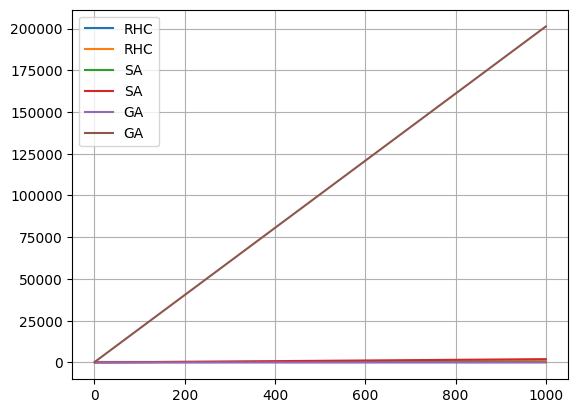